In [2]:
from datasets import load_dataset

english_dataset = load_dataset("thonyyy/english_sentiment_dataset")
indonesian_dataset = load_dataset("thonyyy/indonesian_sentiment_dataset")

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = TFAutoModelForSequenceClassification.from_pretrained("xlm-roberta-base")

Generating train split: 100%|██████████| 1030399/1030399 [00:01<00:00, 751771.78 examples/s]


ImportError: 
TFAutoModelForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.


: 

In [1]:
import torch
import torch_xla.core.xla_model as xm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1. Set up PyTorch/XLA for TPU usage
device = xm.xla_device()

# 2. Load the pre-trained model
model_name = "xlm-roberta-base"  # Example model, change as needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.to(device)

# 3. Data Preparation
text = "Your input text here"  # Example input text
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

# 4. Inference
with torch.no_grad():
    outputs = model(**inputs)

# 5. Retrieve Results
predictions = outputs.logits.argmax(dim=1)
print("Predicted label:", predictions.item())

/home/hikar/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted label: 0


In [13]:
def tokenize_function(examples):
    tokenized_text = tokenizer(examples["text"])
    tokenized_text_len = [len(x) for x in tokenized_text['input_ids']]
    return {'len' : tokenized_text_len}

In [14]:
indonesian_dataset = indonesian_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 3000/1030399 [00:00<00:45, 22360.80 examples/s]

Map: 100%|██████████| 1030399/1030399 [00:46<00:00, 22108.97 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label_text', 'source', 'split', '__index_level_0__', 'len'],
        num_rows: 1030399
    })
})

In [62]:
english_dataset = english_dataset['train'].to_pandas()
english_dataset

,text,label_text,source,split,__index_level_0__
0,Excellent!! Yummy! Great with other foods and...,positive,McAuley-Lab/Amazon-Reviews-2023,raw_review_Grocery_and_Gourmet_Food,0
1,Excellent! The best! I use it with my beef a...,positive,McAuley-Lab/Amazon-Reviews-2023,raw_review_Grocery_and_Gourmet_Food,1
2,These are very tasty. They are extremely soft ...,positive,McAuley-Lab/Amazon-Reviews-2023,raw_review_Grocery_and_Gourmet_Food,2
3,My favorite!,positive,McAuley-Lab/Amazon-Reviews-2023,raw_review_Grocery_and_Gourmet_Food,3
4,Great for making brownies and crinkle cookies.,positive,McAuley-Lab/Amazon-Reviews-2023,raw_review_Grocery_and_Gourmet_Food,4
...,...,...,...,...,...
72110487,Quick and easy! Had similar Gulasch in Guest H...,positive,mteb/tweet_sentiment_extraction,raw_review_Home_and_Kitchen,82427920
72110488,My only complaint is that there's so much of i...,positive,mteb/tweet_sentiment_extraction,raw_review_Home_and_Kitchen,82427927
72110489,I'm disappointed with the flavor. The chocolat...,negative,mteb/tweet_sentiment_extraction,raw_review_Home_and_Kitchen,82427929
72110490,"These stars are small, so you can give 10-15 o...",positive,mteb/tweet_sentiment_extraction,raw_review_Home_and_Kitchen,82427930


In [63]:
english_dataset["label_text"].value_counts()

label_text
positive     46374859
unlabeled    13254449
negative     12468659
neutral         12524
Name: count, dtype: int64

In [64]:
english_dataset["len"] = english_dataset["text"].apply(lambda x:len(x.split(" ")))
english_dataset["len"].hist(bins = 100)

In [ ]:
english_dataset[english_dataset["len"]<=128]

In [17]:
indonesian_dataset = indonesian_dataset.to_pandas()
indonesian_dataset

,text,label_text,source,split,__index_level_0__,len
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,indonlp/indonlu/smsa,train,0,90
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,indonlp/indonlu/smsa,train,1,29
2,lokasi strategis di jalan sumatera bandung . t...,positive,indonlp/indonlu/smsa,train,2,50
3,betapa bahagia nya diri ini saat unboxing pake...,positive,indonlp/indonlu/smsa,train,3,21
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,indonlp/indonlu/smsa,train,4,55
...,...,...,...,...,...,...
1030394,"Pengiriman lebih cepat , packing rapih Dan ba...",unlabeled,grikomsn/lazada-indonesian-reviews,train,1037378,22
1030395,I can't login to activated this netbook becaus...,negative,grikomsn/lazada-indonesian-reviews,train,1037379,27
1030396,"barang ok, pengiriman super lambat dn trpaksa ...",unlabeled,grikomsn/lazada-indonesian-reviews,train,1037380,50
1030397,"mantapp,, terima kasih lazadaaa,, tv coocaa 40...",positive,grikomsn/lazada-indonesian-reviews,train,1037381,33


In [19]:
indonesian_dataset["label_text"].value_counts()

label_text
positive     667699
negative     176885
neutral      164903
unlabeled     20904
Name: count, dtype: int64

In [23]:
indonesian_dataset.sort_values("len")

,text,label_text,source,split,__index_level_0__,len
733132,cukup,positive,alexmariosimanjuntak/dana-app-sentiment-review...,train,733944,3
919592,jualan,positive,itanium/livin-by-mandiri-app-reviews,train,923703,3
582,sejuk,positive,indonlp/indonlu/smsa,train,582,3
775672,ok,positive,christofel04/review-lapak-sentiment,train,777058,3
781954,Sesuai,positive,christofel04/review-lapak-sentiment,train,783431,3
...,...,...,...,...,...,...
536456,"setelah menghabiskan 1 botol, ak memutuskan ut...",positive,FDR Dataset,train,536537,1735
562711,awal januari adalah pengalaman pertama aku men...,positive,FDR Dataset,train,562792,1743
526654,cosrx honey mask ini adalah produk paling favo...,positive,FDR Dataset,train,526735,1833
163550,hai girls! namaku chacha. umurku sekarang 18 t...,positive,FDR Dataset,train,163631,1877


<Axes: >

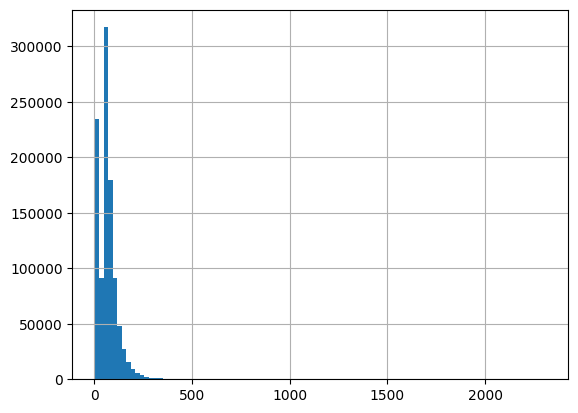

In [22]:
indonesian_dataset["len"].hist(bins = 100)

In [37]:
dataset = indonesian_dataset[indonesian_dataset["len"]<=128]
dataset = dataset.rename(columns={'label_text':'label'})[['text','label']]
from datasets import Dataset
dataset = Dataset.from_pandas(dataset)
dataset

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 938626
})

In [25]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu="local")
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 4
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 4
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM

I0419 09:59:08.372102986  180931 server_builder.cc:352]                Synchronous server. Num CQs: 1, Min pollers: 1, Max Pollers: 2, CQ timeout (msec): 10000


In [27]:
# Verify dataset using existing model
with strategy.scope():
    model_name = "mdhugol/indonesia-bert-sentiment-classification"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [54]:
sample_dataset = dataset[:6400]
sample_dataset

{'text': ['warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !',
  'mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah',
  'lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .',
  'betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !',
  'duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga

In [55]:
import numpy as np

input_sentences = sample_dataset['text']
# Tokenize input sentences
input_ids = []
attention_masks = []
for sentence in input_sentences:
    encoded = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='tf'
    )
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Batch size for inference
batch_size = 32

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_masks))
dataset = dataset.batch(batch_size)

# Perform inference
results = []
for batch in dataset:
    input_ids_batch, attention_masks_batch = batch
    with strategy.scope():
        outputs = model(input_ids_batch, attention_mask=attention_masks_batch)
    logits = outputs.logits.numpy()
    predictions = np.argmax(logits, axis=1)
    results.extend(predictions)

# Output results
print("Inference results:", results)

Inference results: [0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,

2024-04-19 10:29:12.034047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [56]:
import pandas as pd
label_index = {0: 'positive', 1: 'neutral', 2: 'negative'}
df = pd.DataFrame(sample_dataset)
df['predicted_label'] = [label_index[x] for x in results]
df

,text,label,__index_level_0__,predicted_label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,0,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,1,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive,2,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive,3,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,4,negative
...,...,...,...,...
6395,"penasaran sudah lama mau ke sini , alhamdulill...",positive,6401,positive
6396,"yang terhormat , kamu kenapa malam ini , kecrp...",neutral,6402,negative
6397,"rio pratama pengecut banget ya , belum saja bi...",negative,6403,negative
6398,"tempat nya sangat amat standar , tidak ada kek...",positive,6404,positive


In [58]:
c = 0
for index, row in df[df['label'] != df['predicted_label']].iterrows():
    print(row['text'])
    print('TRUE:',row['label'])
    print('PREDICTED:',row['predicted_label'])
    print('------------')
    c+=1

menarik pilkada jawa barat ini . ada ridwan kamil berpasangan dengan tokoh dari dc universe .
TRUE: positive
PREDICTED: neutral
------------
bakmi tasik saya dan beberapa teman mampir dan coba bakmi bakso nya . makanan nya biasa-biasa saja . tidak ada yang special .
TRUE: negative
PREDICTED: positive
------------
semoga selalu setia menemani rakyat indonesia dari sabang - merauke , dari kota sampai pelosok desa .
TRUE: neutral
PREDICTED: positive
------------
harapan kami anda sebagai pemimpin negeri ini . kekayaan yang kita miliki . akan kembali kepada rakyat , rakyat hidup makmur , nkri harga mati . kita rebut kembali kekayaan negeri ini yang telah jadi bancakan para penghianat dan penjual aset bangsa . bravo bung prabowo . insyaallah
TRUE: neutral
PREDICTED: positive
------------
lumayanlah kalau pengen nyobain makan dengan sensasi yang berbeda pakai alas daun begitu , rasanya ya begitu saja , kita pesan terus goreng , tapi bagus nya di sini itu dikasih kuah gratis , kuah rendang di

In [60]:
print("accuracy",1-c/6400)

accuracy 0.99125


# TRAINING

In [8]:
import pandas as pd
from datasets import Dataset, concatenate_datasets

df = pd.read_csv("data/result_correction_1.csv")
ds = Dataset.from_pandas(df).select_columns(['text', 'label_text', 'source', 'split'])
#ds.push_to_hub('thonyyy/indonesian_sentiment_dataset_v1', private=True)

concatenate_datasets([ds, ds])


Dataset({
    features: ['text', 'label_text', 'source', 'split'],
    num_rows: 2060790
})

: 

In [33]:
def tokenize_function(examples):
    return tokenizer(
        examples["text"], padding="max_length", truncation=True, max_length=128
    )


# This will add the tokenizer output to the dataset as new columns
dataset = dataset.map(tokenize_function)

BATCH_SIZE = 8 * strategy.num_replicas_in_sync

# prepare_tf_dataset() will choose columns that match the model's input names
tf_dataset = model.prepare_tf_dataset(
    dataset, batch_size = BATCH_SIZE, shuffle=True, tokenizer=tokenizer
)

Map: 100%|██████████| 938626/938626 [05:49<00:00, 2685.18 examples/s]


In [ ]:
model.fit(tf_dataset)